In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [5]:
print(X)
print(y)

[[-0.63326028  0.12485095 -1.03628034 ... -1.07088823  0.41031054
  -0.92655695]
 [-0.60097475 -0.58885279 -0.25831126 ...  0.06047401  0.41031054
  -0.22972861]
 [-0.60100552 -0.58885279 -0.25831126 ...  0.06047401  0.31149419
  -1.08568842]
 ...
 [-0.56479774 -0.58885279 -0.56557636 ...  1.14658176  0.23574309
  -0.80930218]
 [-0.5854857  -0.58885279 -0.56557636 ...  1.14658176  0.22821654
  -0.63006989]
 [-0.58205565 -0.58885279 -0.56557636 ...  1.14658176  0.41031054
  -0.41901131]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64


### 기본 모델을 통한 교차 검증

In [6]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [7]:
# 학습 모델들
model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge()
model4 = Lasso()
model5 = ElasticNet()
model6 = SVR()
model7 = DecisionTreeRegressor()
model8 = RandomForestRegressor()
model9 = AdaBoostRegressor()
model10 = GradientBoostingRegressor()
model11 = LGBMRegressor()
model12 = XGBRegressor()

model_list = [model1, model2, model3, model4, model5, model6, model7,
               model8, model9, model10, model11, model12]

In [8]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'Ridge', 'Lasso', 'EN', 'SVM', 'DT', 'RF', 
              'Ada', 'GB', 'LGBM', 'XGB']

In [9]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [10]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='r2', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.8009118485899039
LR 평균 성능 수치 : 0.8509777564842589
Ridge 평균 성능 수치 : 0.8510047417482983
Lasso 평균 성능 수치 : 0.7967879509364957
EN 평균 성능 수치 : 0.7459387927966984
SVM 평균 성능 수치 : 0.6398944457914795
DT 평균 성능 수치 : 0.8271545349710625
RF 평균 성능 수치 : 0.8974528763914223
Ada 평균 성능 수치 : 0.867401298251276
GB 평균 성능 수치 : 0.9125008796987121
LGBM 평균 성능 수치 : 0.9097644022113087
XGB 평균 성능 수치 : 0.890739990337275


### 하이퍼 파라미터 튜닝

In [11]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LinearRegression
    {},
    # Ridge
    {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # Lasso
    {
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # ElasticNet
    {
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [12]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [13]:
for idx, m1 in enumerate(model_list) :
    # LinearRegression은 제외한다.
    if idx == 1 :
        continue
    
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='r2', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 3}
최적의 모델 평균 성능 : 0.8376627503363364
----------------------------------------------
Ridge
최적의 하이퍼 파라미터 : {'alpha': 1}
최적의 모델 평균 성능 : 0.8510047417482983
----------------------------------------------
Lasso
최적의 하이퍼 파라미터 : {'alpha': 0}
최적의 모델 평균 성능 : 0.8509777564842587
----------------------------------------------
EN
최적의 하이퍼 파라미터 : {'alpha': 0.01}
최적의 모델 평균 성능 : 0.8509925475043936
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 100}
최적의 모델 평균 성능 : 0.9086789533233993
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 5}
최적의 모델 평균 성능 : 0.8471543400565975
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 250}
최적의 모델 평균 성능 : 0.899873198952654
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.8727696192870082
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_est

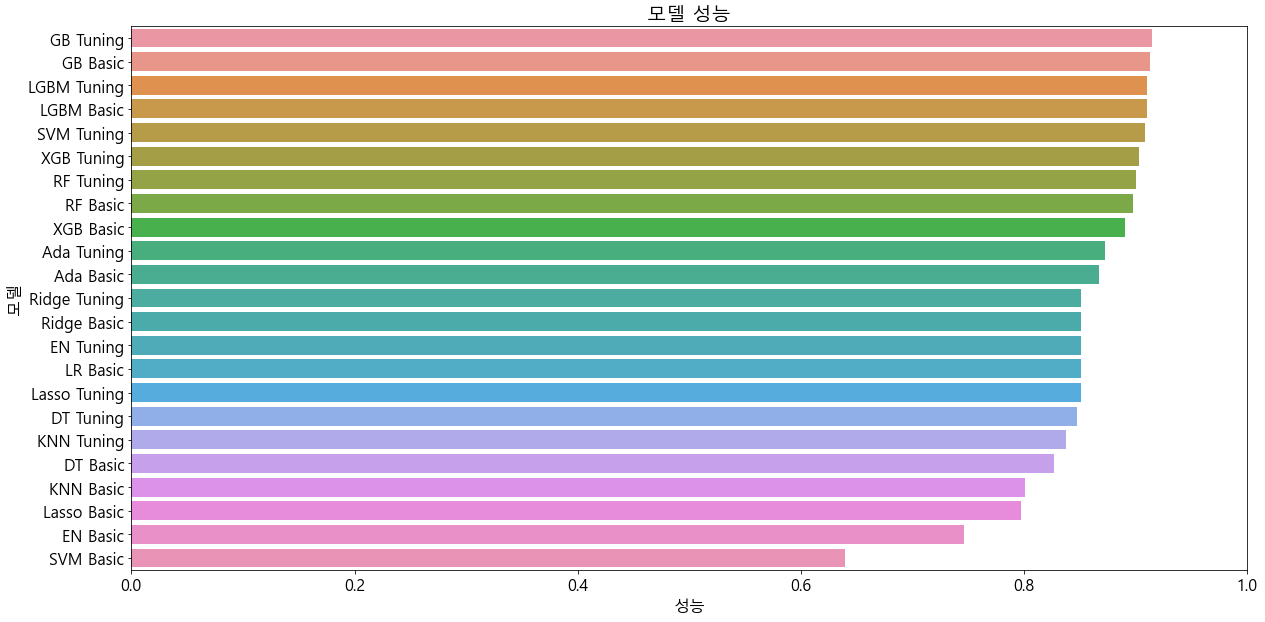

In [14]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 최종 평가를 수행한다.

In [15]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# 기본 모델과 튜닝된 모델이 담긴 리스트를 합친 새로운 리스트를 생성한다.
total_model = model_list + tuning_model

In [17]:
# 학습용 데이터를 학습한다.
for m1 in total_model :
    m1.fit(X_train, y_train)

In [18]:
# 학습용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_train)
    pred_list.append(pred)

In [19]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'r2' : [],
    'mse' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = r2_score(y_train, p1)
    r2 = mean_squared_error(y_train, p1)
    
    dict1['r2'].append(r1)
    dict1['mse'].append(r2)
    dict1['name'].append(result_name[idx])

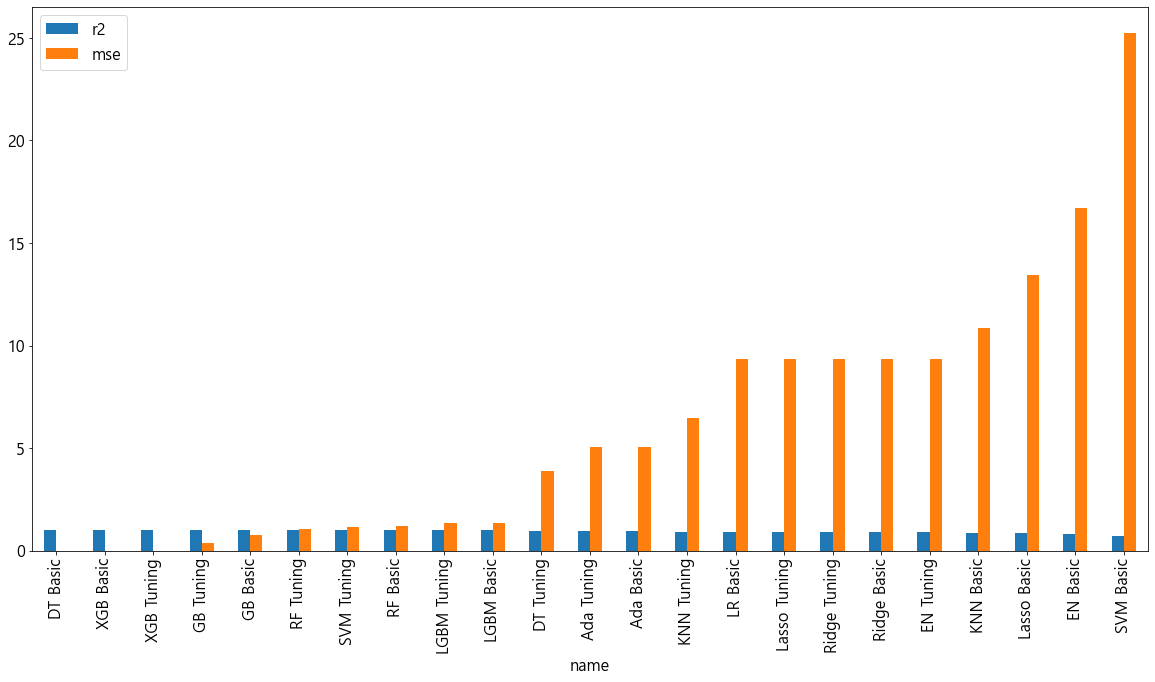

In [20]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('r2', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

In [21]:
# 검증용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_test)
    pred_list.append(pred)

In [22]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'r2' : [],
    'mse' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = r2_score(y_test, p1)
    r2 = mean_squared_error(y_test, p1)
    
    dict1['r2'].append(r1)
    dict1['mse'].append(r2)
    dict1['name'].append(result_name[idx])

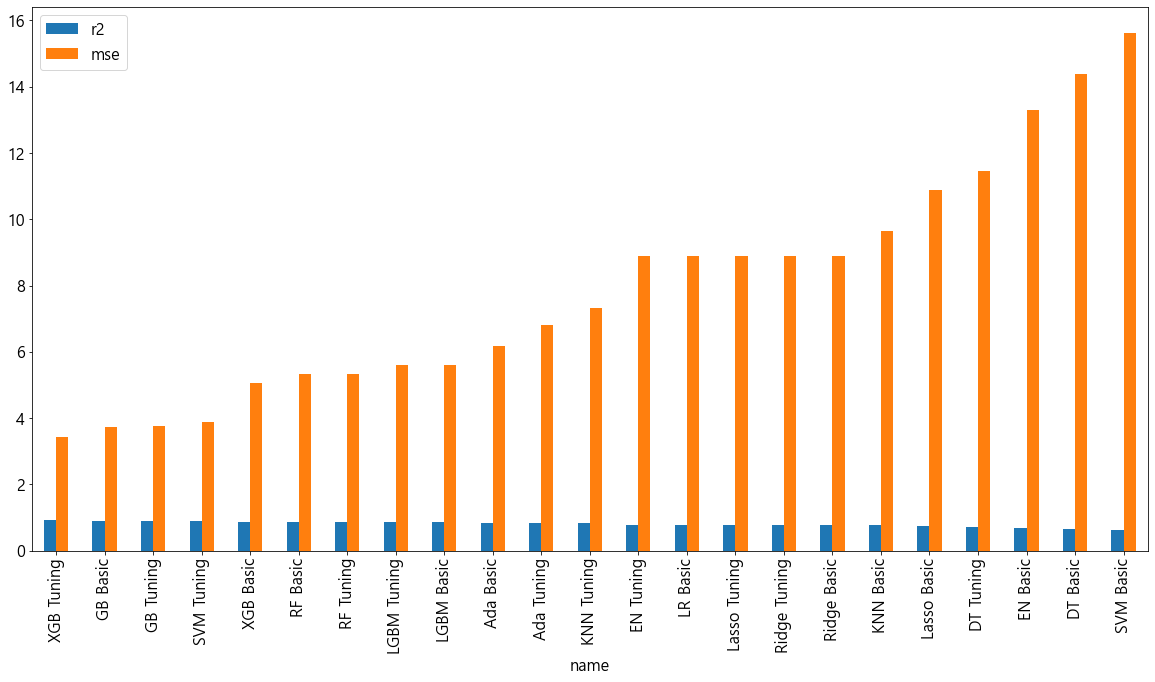

In [23]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('r2', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

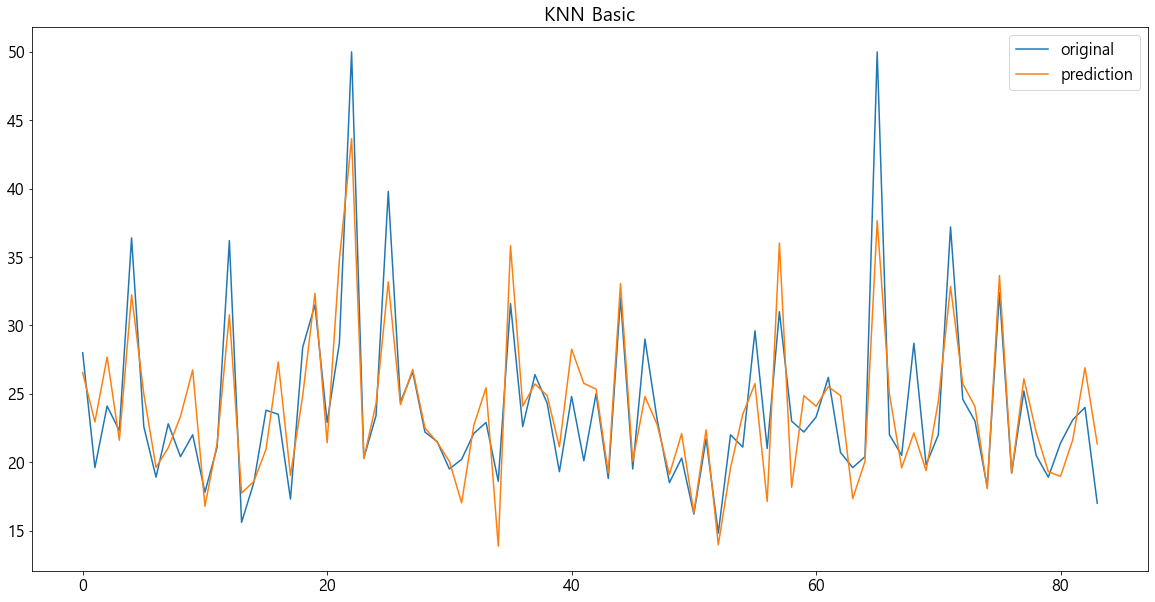

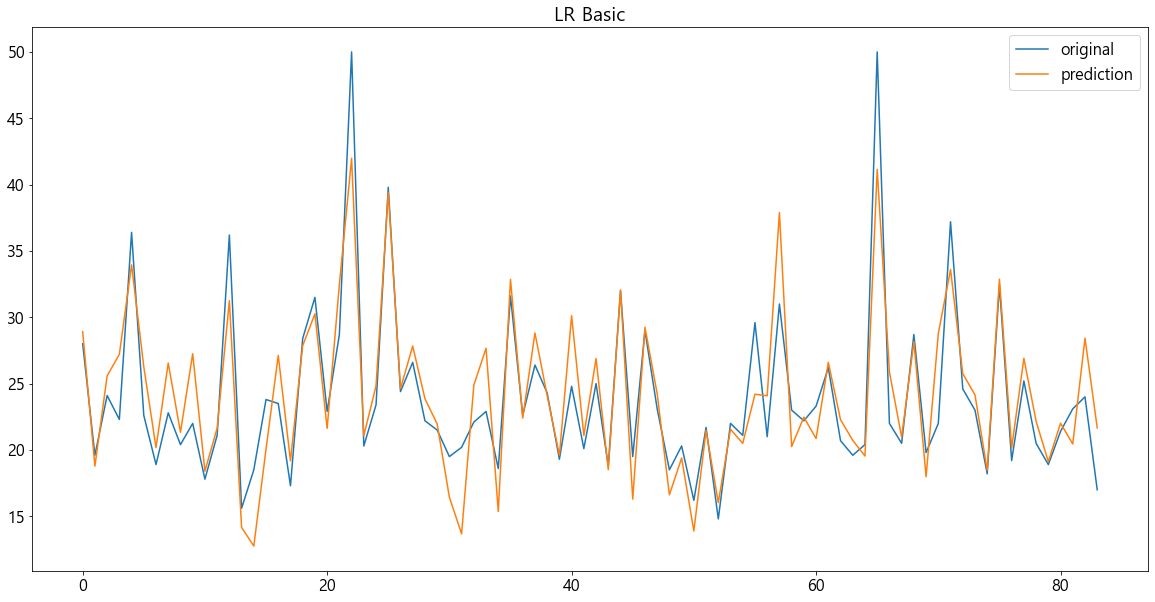

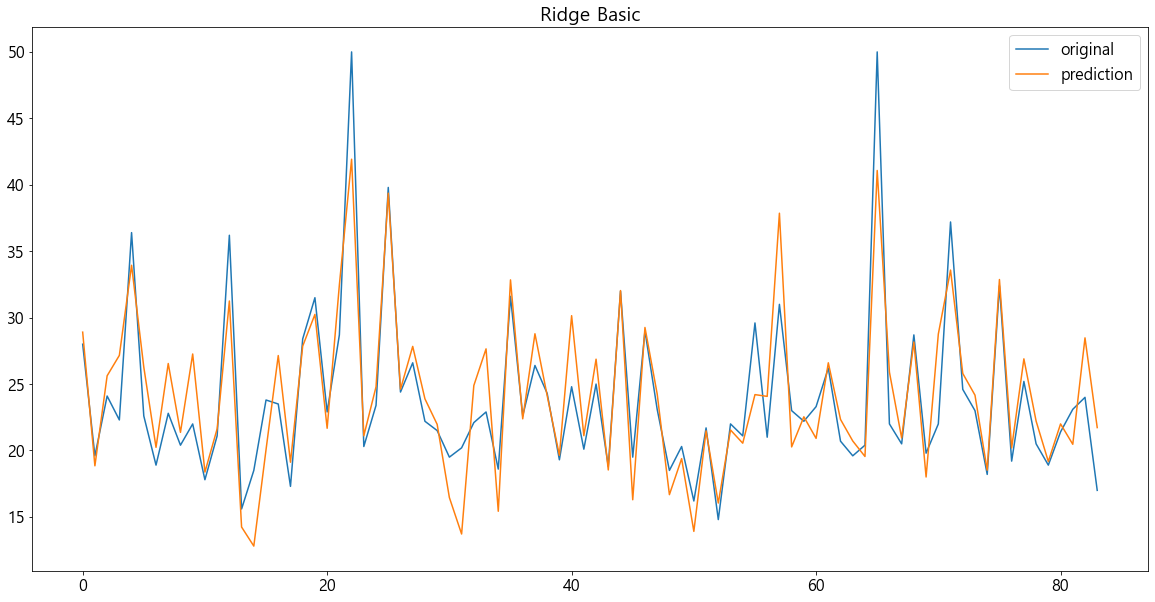

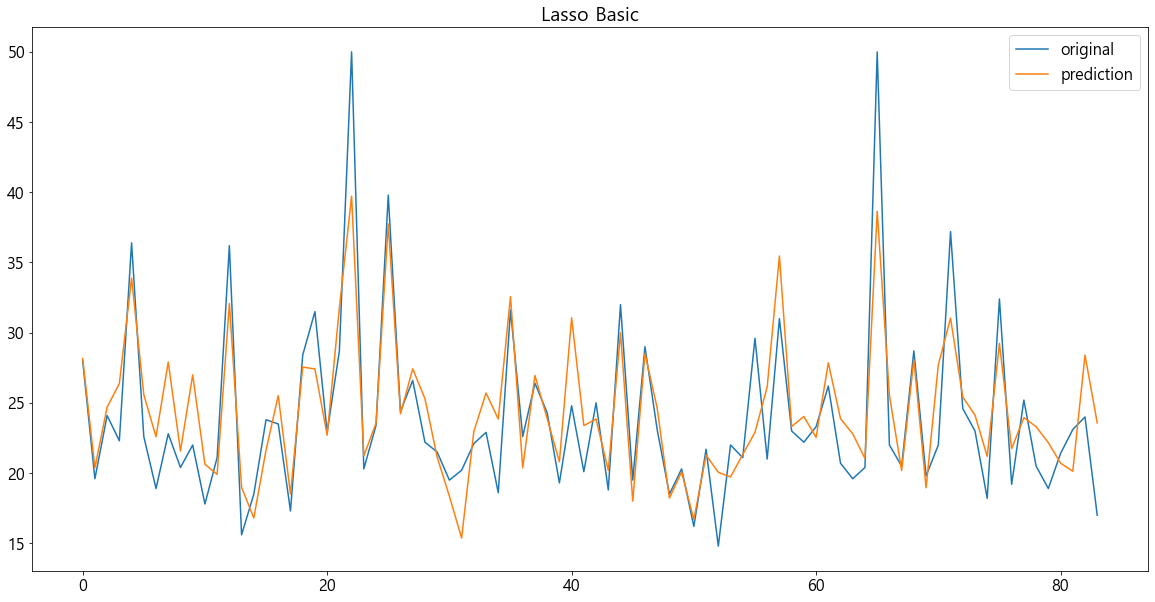

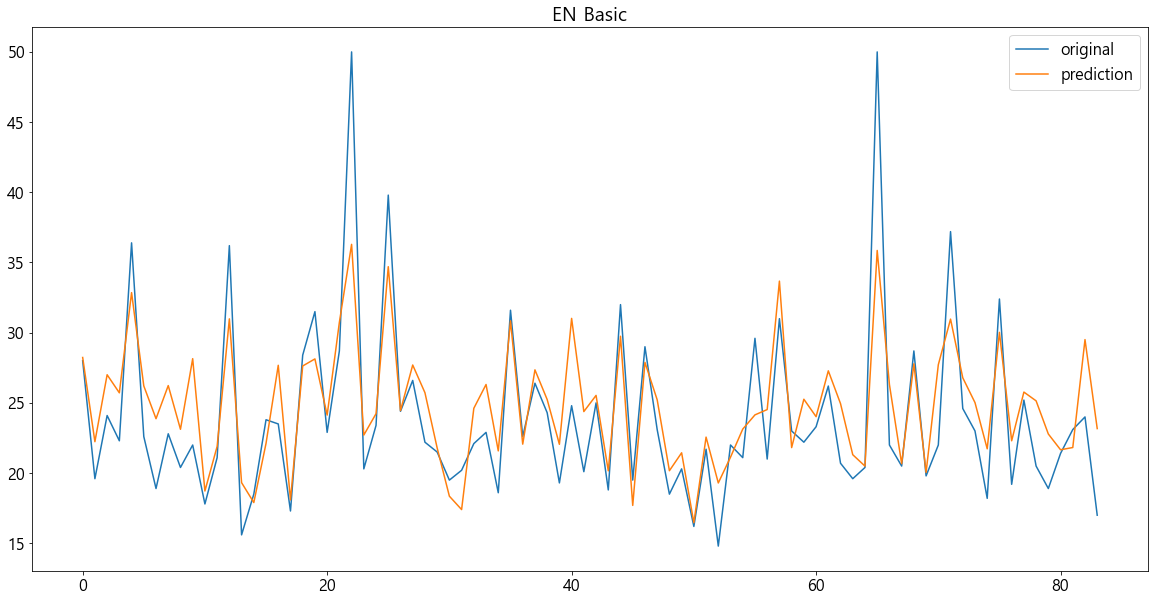

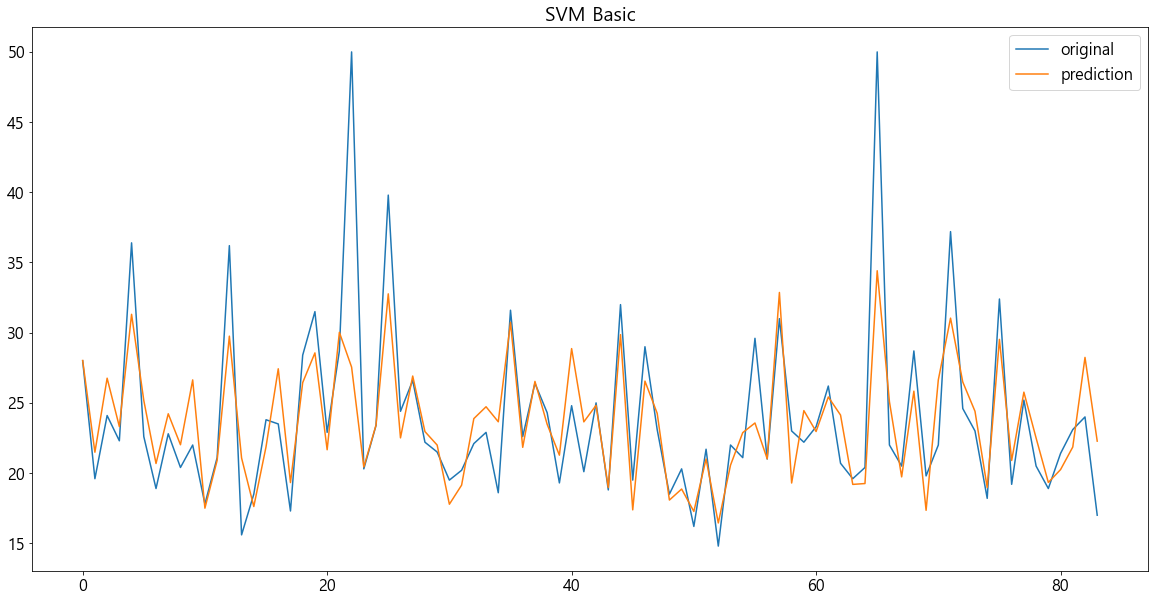

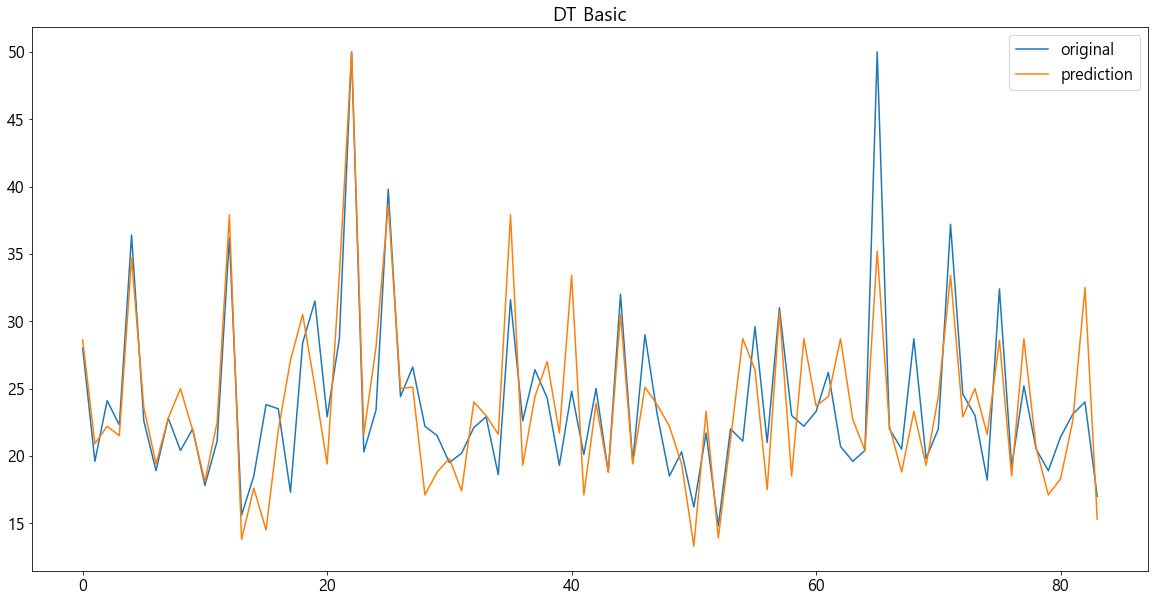

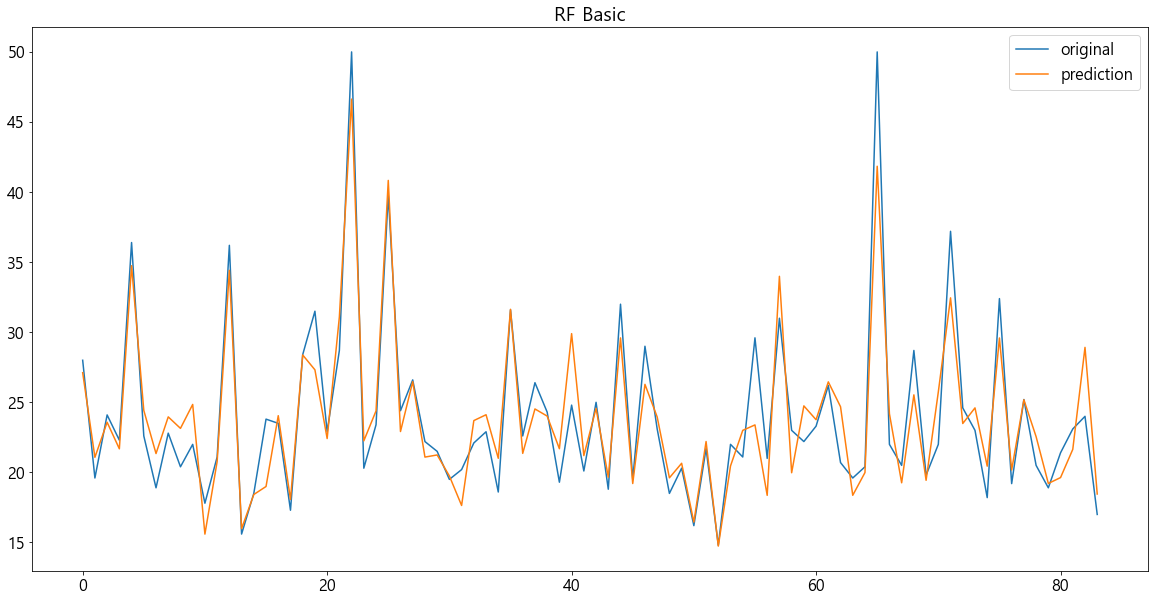

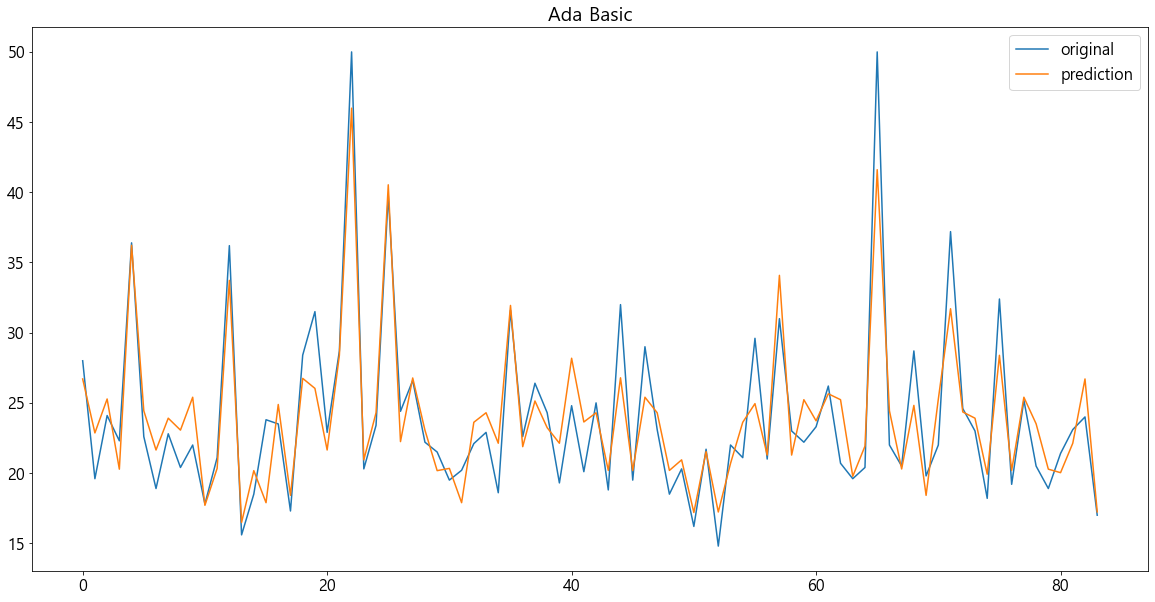

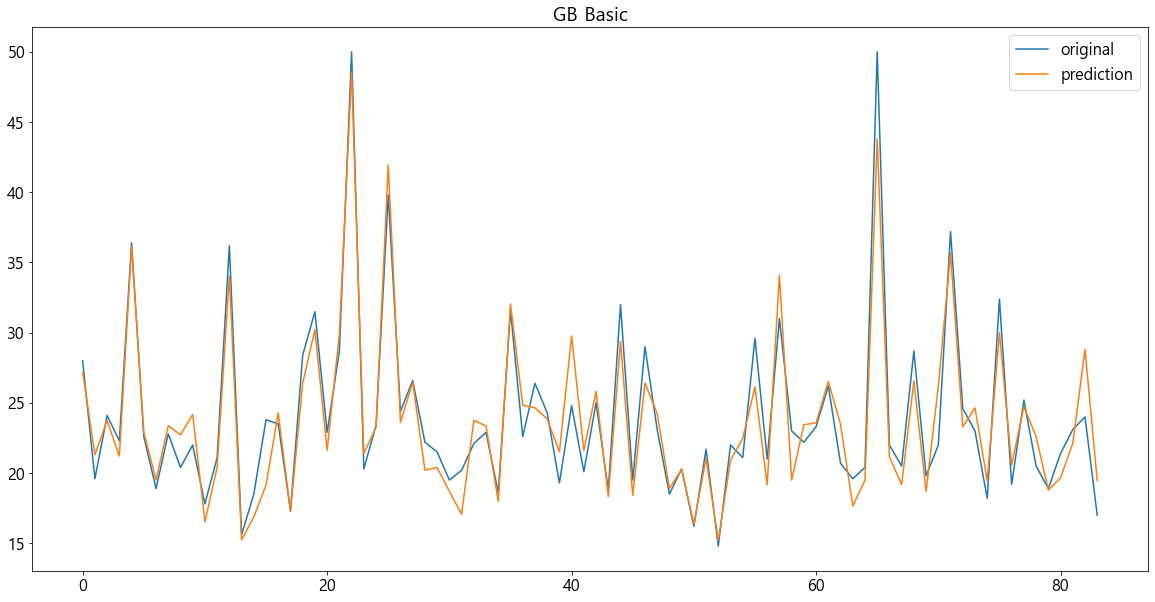

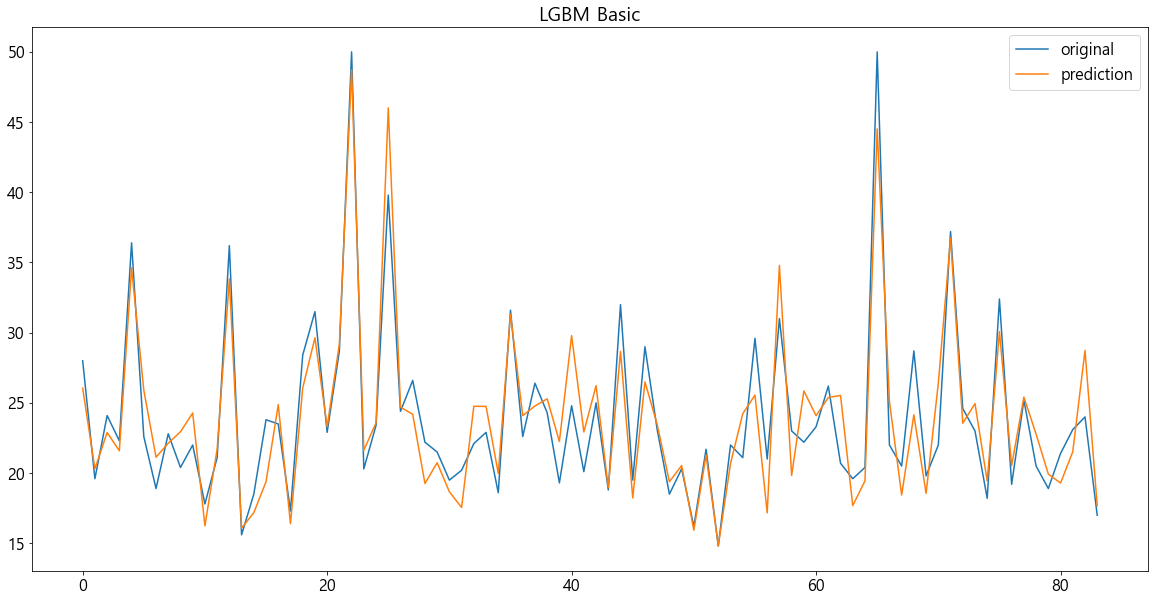

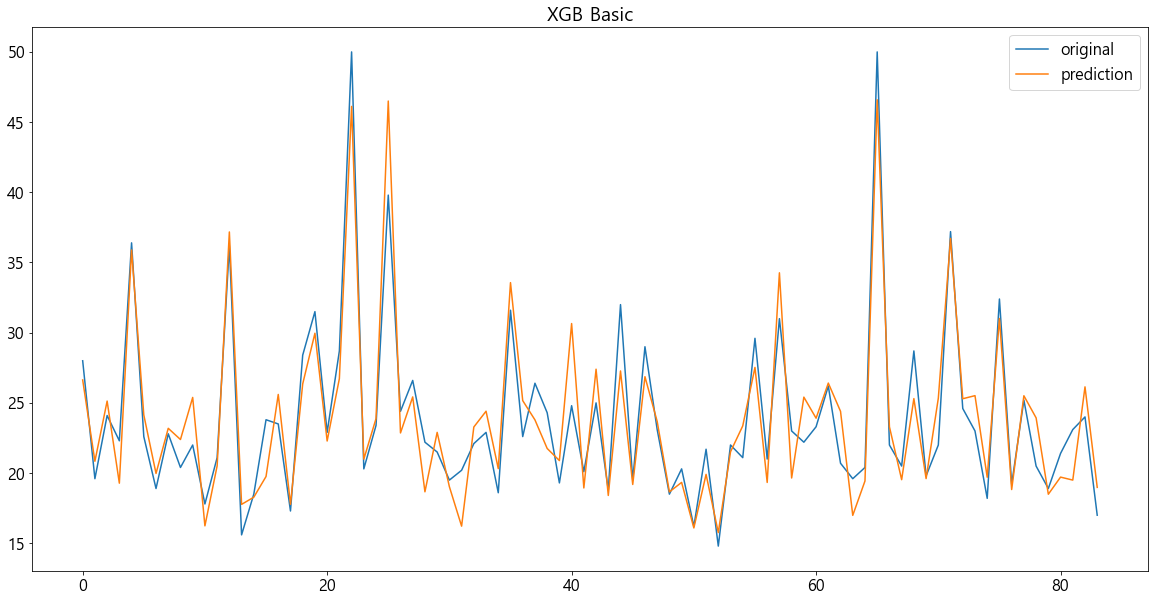

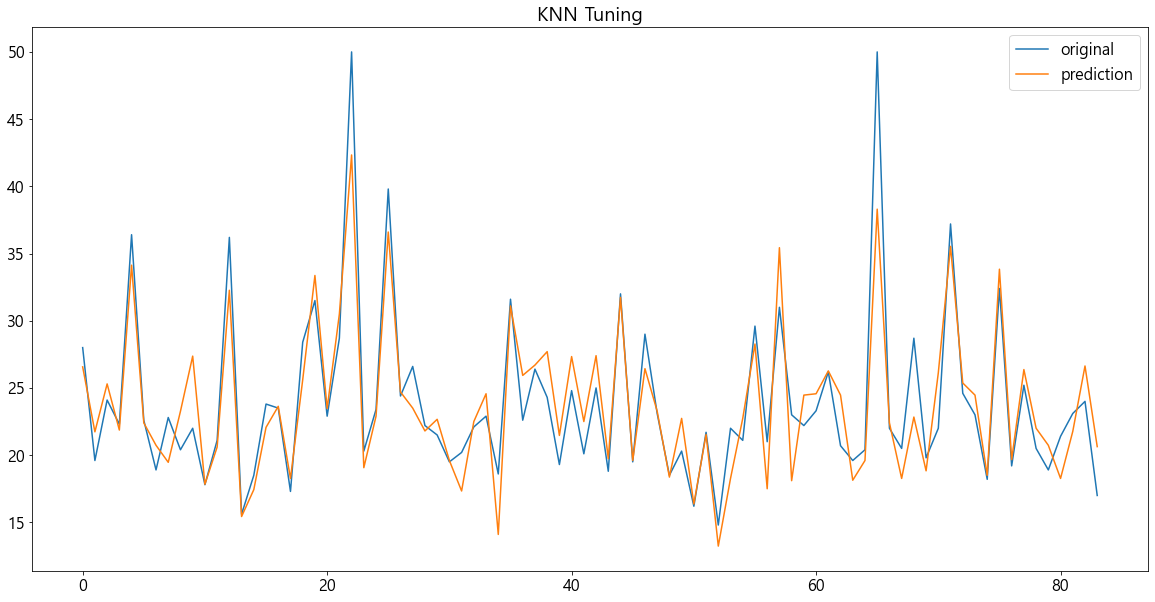

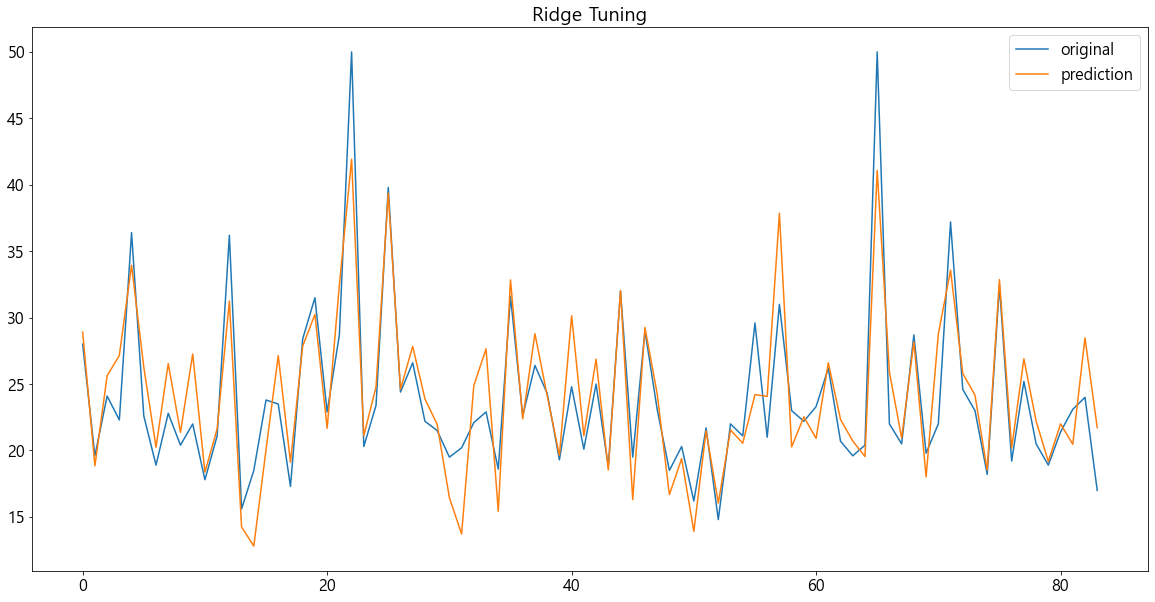

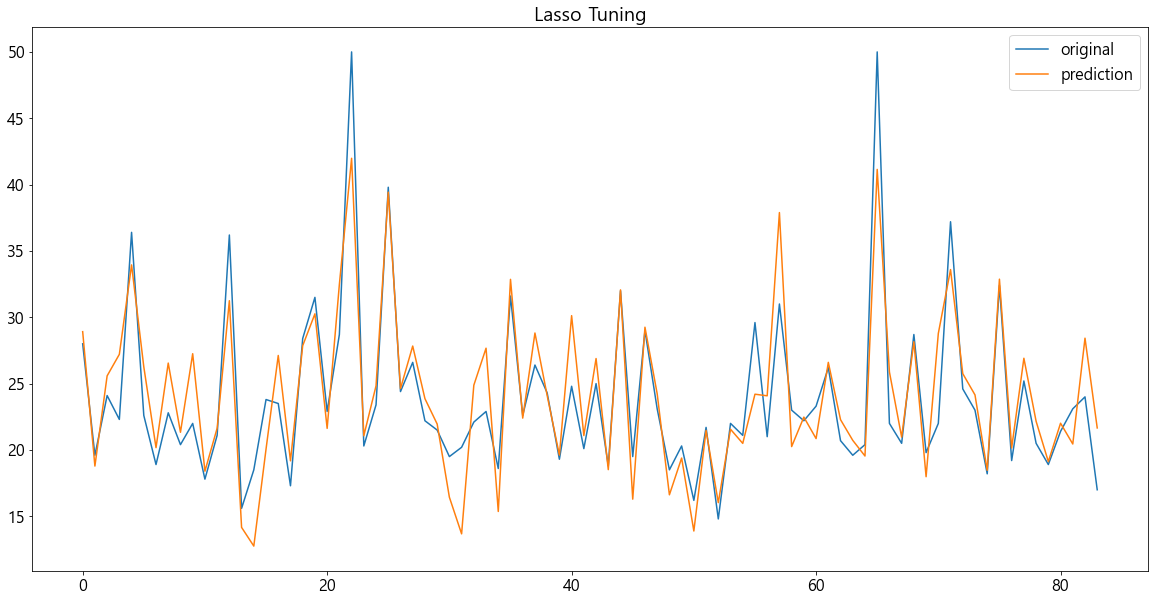

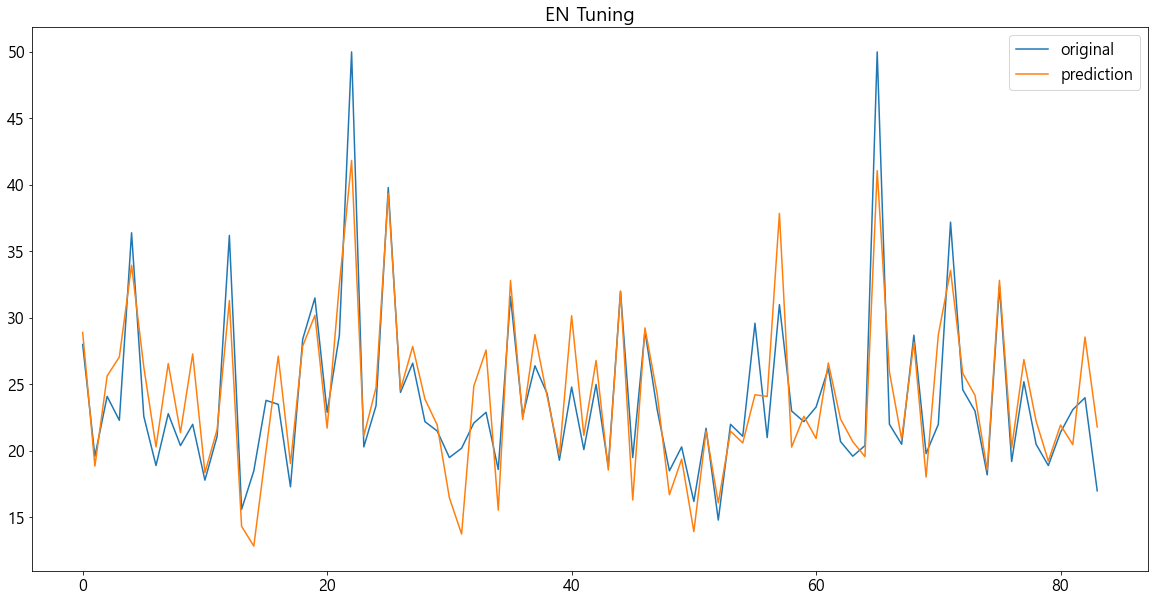

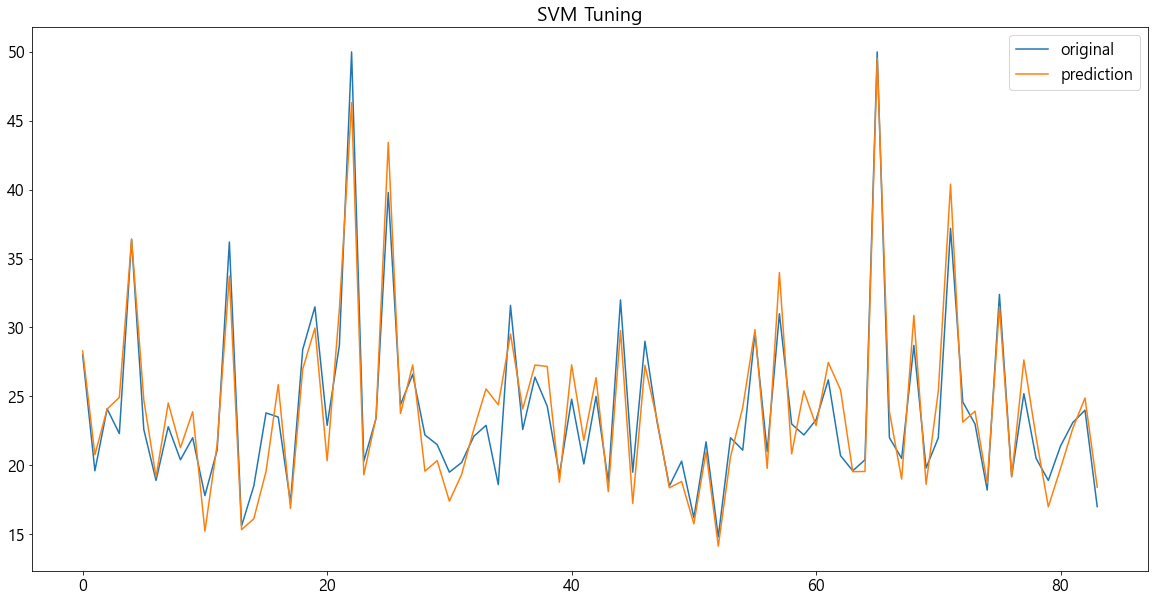

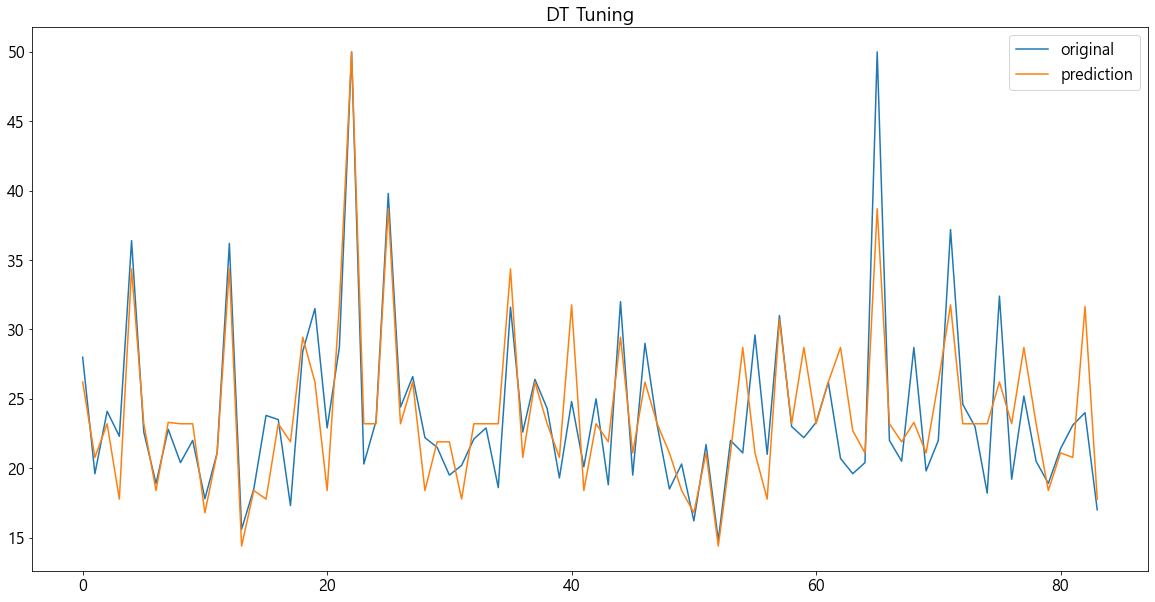

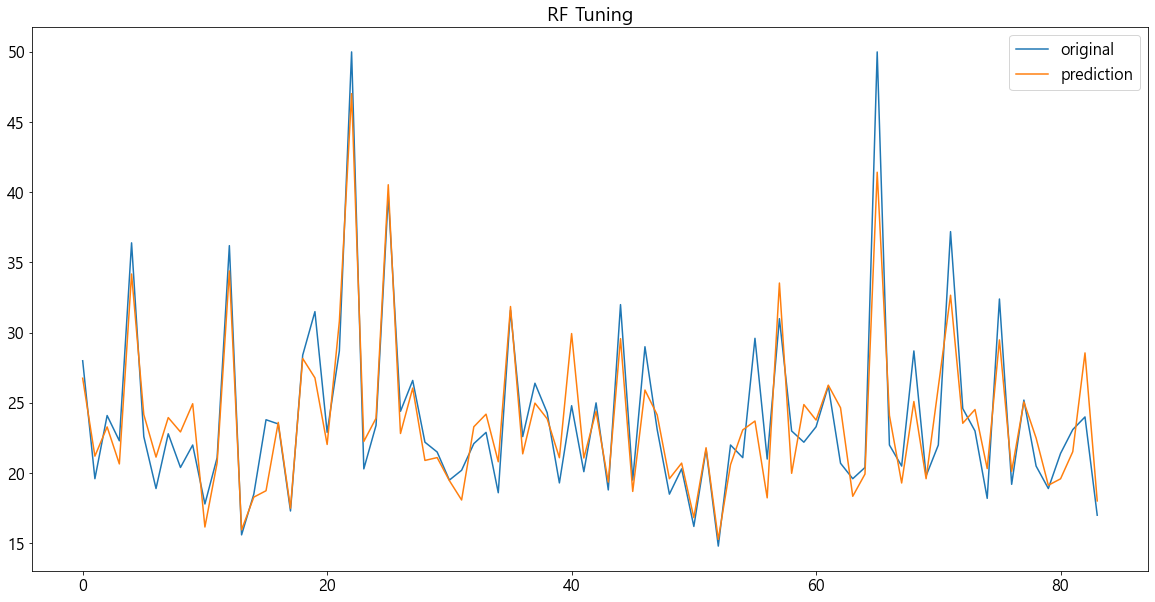

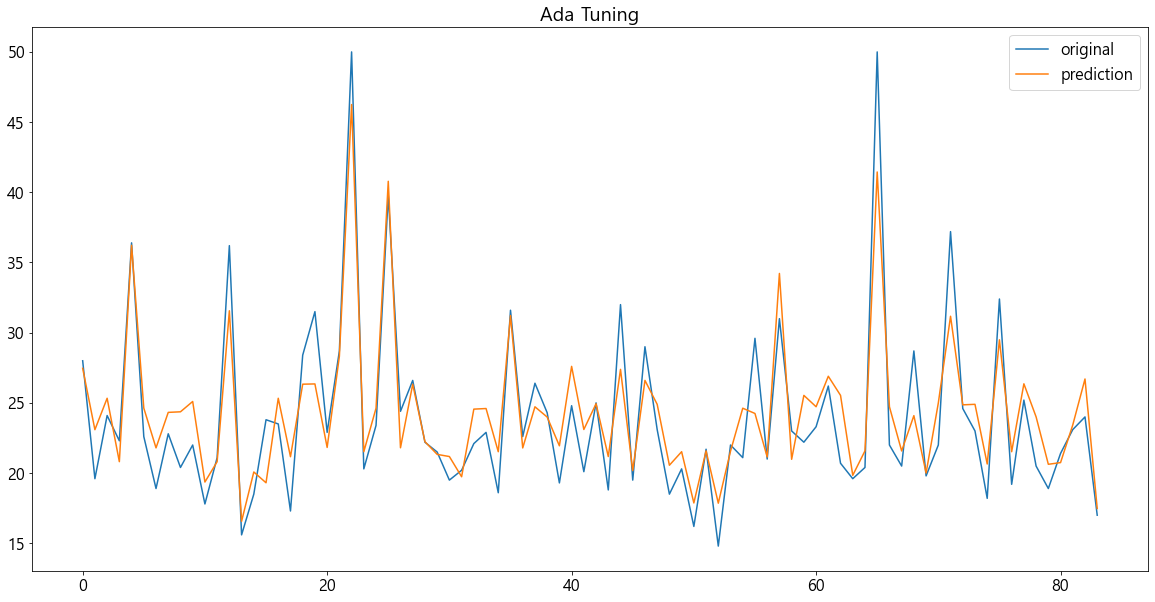

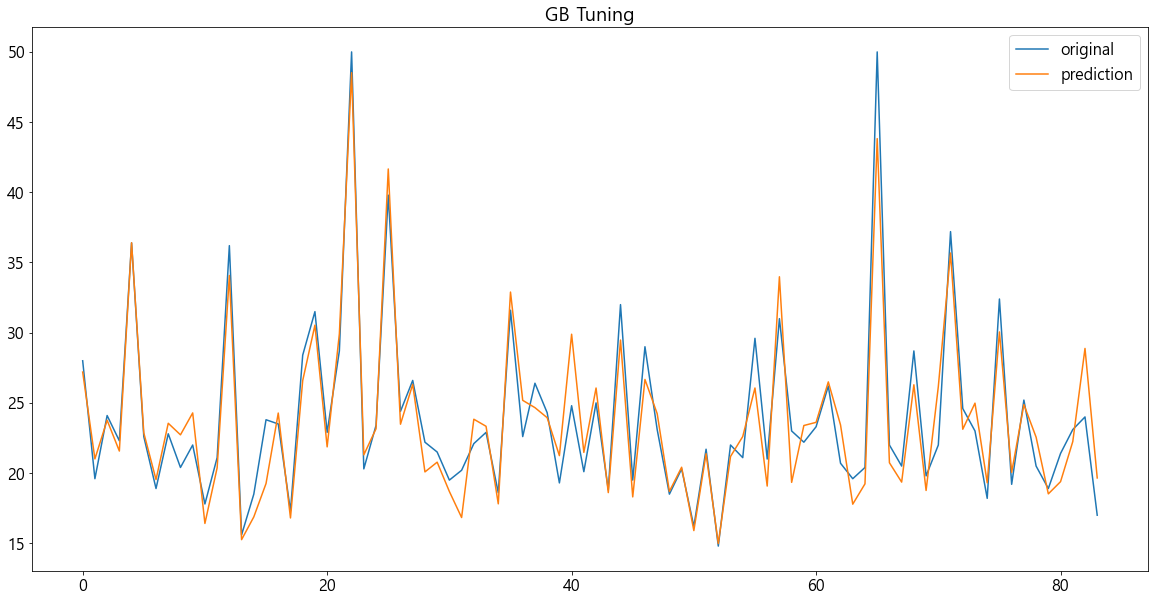

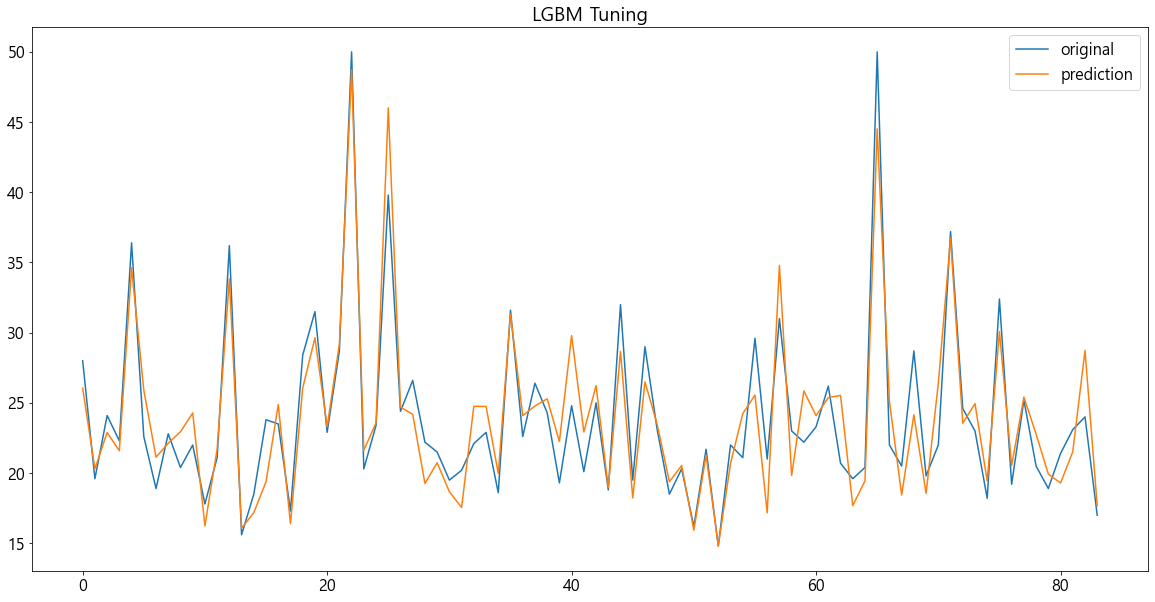

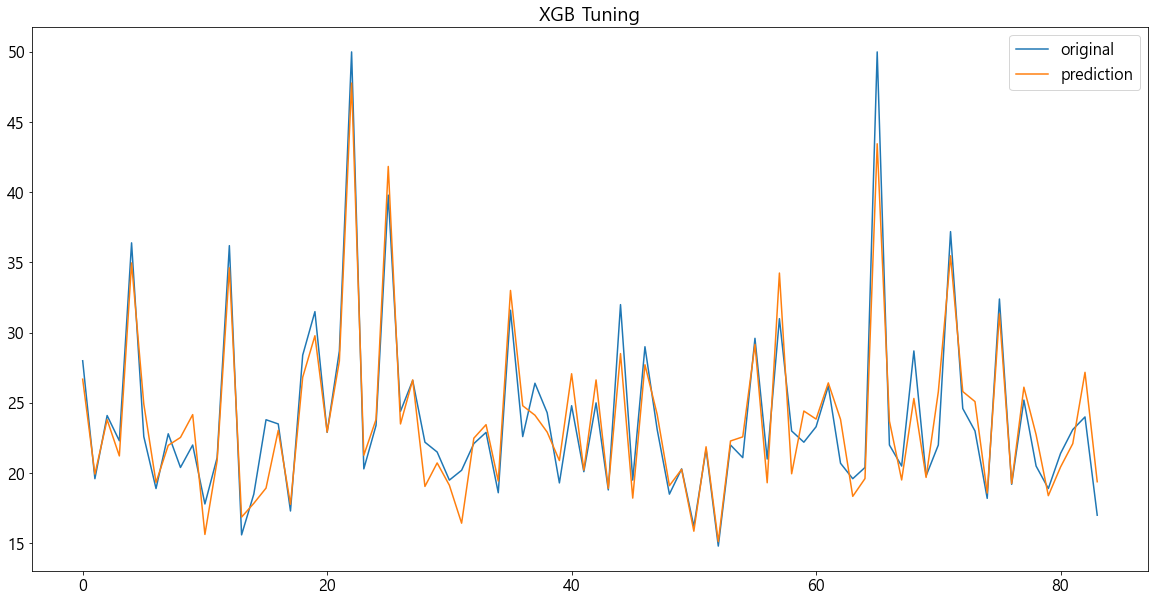

In [24]:
# 예측 결과와 진짜 결과의 패턴을 시각화
for idx, pred in enumerate(pred_list) :
    plt.plot(y_test.values, label='original')
    plt.plot(pred, label='prediction')
    plt.legend()
    plt.title(result_name[idx])
    plt.show()

### 검증용 데이터로 평가한 결과
- 모든 모델이 r2 수치(패턴)은 유사했다.
- mse인 경우 XGB Tuning, GB Basic, GB Tuning, SVM Tuning 외에는 높은 수치가 나타났다.
- 가장 mse가 낮은 XGB Tuning 모델을 사용한다.

### 선정된 모델에 전체 데이터를 학습시킨다.

In [27]:
best_model = tuning_model[-1]

best_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 예측한다.

In [28]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [29]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [30]:
# 예측한다.
y_pred1 = best_model.predict(X)

In [31]:
# 저장한다.
df2['target'] = y_pred1
df2.to_csv('data/boston_predict.csv')